In [1]:
from __future__ import print_function

this notebook is based on the SciPy NumPy tutorial

Note that the traditional way to import `numpy` is to rename it `np`.  This saves on typing and makes your code a little more compact.

In [2]:
import numpy as np

# NumPy

NumPy provides a multidimensional array class as well as a _large_ number of functions that operate on arrays.

NumPy arrays allow you to write fast (optimized) code that works on arrays of data.  To do this, there are some restrictions on arrays:

* all elements are of the same data type (e.g. float)
* the size of the array is fixed in memory, and specified when you create the array (e.g., you cannot grow the array like you do with lists)

The nice part is that arithmetic operations work on entire arrays -- this means that you can avoid writing loops in python (which tend to be slow).  Instead the "looping" is done in the underlying compiled code

# Array Creation and Properties

There are a lot of ways to create arrays.  Let's look at a few

Here we create an array using `arange` and then change its shape to be 3 rows and 5 columns.  Note the row-major ordering -- you'll see that the rows are together in the inner [] (more on this in a bit)

In [4]:
a = np.arange(15)

In [5]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [6]:
a = np.arange(15).reshape(3,5)

print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


A NumPy array has a lot of meta-data associated with it describing its shape, datatype, etc.

In [7]:
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype)
print(a.itemsize)
print(type(a))

2
(3, 5)
15
int64
8
<class 'numpy.ndarray'>


In [8]:
help(a)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

we can create an array from a list

In [10]:
b = np.array( [1.0, 2.0, 3.0, 4.0] )
print(b)
print(b.dtype)
print(type(b))

[ 1.  2.  3.  4.]
float64
<class 'numpy.ndarray'>


we can create a multi-dimensional array of a specified size initialized all to 0 easily.  There is also an analogous ones() and empty() array routine.  Note that here we explicitly set the datatype for the array. 

Unlike lists in python, all of the elements of a numpy array are of the same datatype

In [14]:
c = np.eye(10, dtype=np.float64)
c

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

`linspace` (and `logspace`) create arrays with evenly space (in log) numbers.  For `logspace`, you specify the start and ending powers (`base**start` to `base**stop`)

In [17]:
d = np.linspace(0, 1, 10, endpoint=False)
print(d)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


In [19]:
e = np.logspace(-1, 2, 15, endpoint=True, base=10)
print(e)

[   0.1           0.16378937    0.26826958    0.43939706    0.71968567
    1.17876863    1.93069773    3.16227766    5.17947468    8.48342898
   13.89495494   22.75845926   37.2759372    61.05402297  100.        ]


As always, as for help -- the numpy functions have very nice docstrings

In [20]:
help(np.logspace)

Help on function logspace in module numpy.core.function_base:

logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
    Return numbers spaced evenly on a log scale.
    
    In linear space, the sequence starts at ``base ** start``
    (`base` to the power of `start`) and ends with ``base ** stop``
    (see `endpoint` below).
    
    Parameters
    ----------
    start : float
        ``base ** start`` is the starting value of the sequence.
    stop : float
        ``base ** stop`` is the final value of the sequence, unless `endpoint`
        is False.  In that case, ``num + 1`` values are spaced over the
        interval in log-space, of which all but the last (a sequence of
        length `num`) are returned.
    num : integer, optional
        Number of samples to generate.  Default is 50.
    endpoint : boolean, optional
        If true, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    base : float, optional
        The base of 

we can also initialize an array based on a function

In [21]:
f = np.fromfunction(lambda i, j: i + j, (3, 3), dtype=int)
f

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

# Array Operations

most operations (`+`, `-`, `*`, `/`) will work on an entire array at once, element-by-element.

Note that that the multiplication operator is not a matrix multiply (there is a new operator in python 3.5+, `@`, to do matrix multiplicaiton.

Let's create a simply array to start with

In [22]:
a = np.arange(12).reshape(3,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Multiplication by a scalar multiplies every element

In [23]:
a*2

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

adding two arrays adds element-by-element

In [24]:
a + a

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

multiplying two arrays multiplies element-by-element

In [25]:
a*a

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

We can think of our 2-d array a was a 3 x 5 matrix (3 rows, 5 columns).  We can take the transpose to geta 5 x 3 matrix, and then we can do a matrix multiplication

In [26]:
b = a.transpose()
b

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [27]:
a @ b

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

We can sum along axes or the entire array

In [29]:
a.sum(axis=0)

array([12, 15, 18, 21])

In [30]:
a.sum()

66

Also get the extrema

In [31]:
print(a.min(), a.max())

0 11


### universal functions

universal functions work element-by-element.  Let's create a new array scaled by `pi`

In [32]:
b = a*np.pi/12.0
print(b)

[[ 0.          0.26179939  0.52359878  0.78539816]
 [ 1.04719755  1.30899694  1.57079633  1.83259571]
 [ 2.0943951   2.35619449  2.61799388  2.87979327]]


In [33]:
c = np.cos(b)
print(c)

[[  1.00000000e+00   9.65925826e-01   8.66025404e-01   7.07106781e-01]
 [  5.00000000e-01   2.58819045e-01   6.12323400e-17  -2.58819045e-01]
 [ -5.00000000e-01  -7.07106781e-01  -8.66025404e-01  -9.65925826e-01]]


In [34]:
d = b + c 

In [35]:
print(d)

[[ 1.          1.22772521  1.38962418  1.49250494]
 [ 1.54719755  1.56781598  1.57079633  1.57377667]
 [ 1.5943951   1.64908771  1.75196847  1.91386744]]


# Slicing

slicing works very similarly to how we saw with strings.  Remember, python uses 0-based indexing

![](slicing.png)

Let's create this array from the image:

In [36]:
a = np.arange(9)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Now look at accessing a single element vs. a range (using slicing)

Giving a single (0-based) index just references a single value

In [37]:
a[2]

2

In [41]:
print(a[2:3])

[2]


In [42]:
a[2:4]

array([2, 3])

In [43]:
a[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

## Multidimensional Arrays

Multidimensional arrays are stored in a contiguous space in memory -- this means that the columns / rows need to be unraveled (flattened) so that it can be thought of as a single one-dimensional array.  Different programming languages do this via different conventions:

![](row_column_major.png)

Storage order:

* Python/C use *row-major* storage: rows are stored one after the other
* Fortran/matlab use *column-major* storage: columns are stored one after another

The ordering matters when 

* passing arrays between languages (we'll talk about this later this semester)
* looping over arrays -- you want to access elements that are next to one-another in memory
  * e.g, in Fortran:
  <pre>
  double precision :: A(M,N)
  do j = 1, N
     do i = 1, M
        A(i,j) = …
     enddo
  enddo
  </pre>
  
  * in C
  <pre>
  double A[M][N];
  for (i = 0; i < M; i++) {
     for (j = 0; j < N; j++) {
        A[i][j] = …
     }
  }  
  </pre>
  

In python, using NumPy, we'll try to avoid explicit loops over elements as much as possible

Let's look at multidimensional arrays:

In [44]:
a = np.arange(15).reshape(3,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Notice that the output of `a` shows the row-major storage.  The rows are grouped together in the inner `[...]`

Giving a single index (0-based) for each dimension just references a single value in the array

In [45]:
a[1,1]

6

Doing slices will access a range of elements.  Think of the start and stop in the slice as referencing the left-edge of the slots in the array.

In [46]:
a[0:2,0:2]

array([[0, 1],
       [5, 6]])

Access a specific column

In [47]:
a[:,1]

array([ 1,  6, 11])

Sometimes we want a one-dimensional view into the array -- here we see the memory layout (row-major) more explicitly

In [48]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

we can also iterate -- this is done over the first axis (rows)

In [49]:
for row in a:
    print(row)

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]


or element by element

In [50]:
for e in a.flat:
    print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [51]:
help(a.flatten())

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

# Copying Arrays

simply using "=" does not make a copy, but much like with lists, you will just have multiple names pointing to the same ndarray object

Therefore, we need to understand if two arrays, `A` and `B` point to:
* the same array, including shape and data/memory space
* the same data/memory space, but perhaps different shapes (a _view_)
* a separate cpy of the data (i.e. stored completely separately in memory)

All of these are possible:
* `B = A`
  
  this is _assignment_.  No copy is made. `A` and `B` point to the same data in memory and share the same shape, etc.  They are just two different labels for the same object in memory
  

* `B = A[:]`

  this is a _view_ or _shallow copy_.  The shape info for A and B are stored independently, but both point to the same memory location for data
  
  
* `B = A.copy()`

  this is a _deep_ copy.  A completely separate object will be created in memory, with a completely separate location in memory.
  
Let's look at examples

In [52]:
a = np.arange(10)
print(a)


[0 1 2 3 4 5 6 7 8 9]


Here is assignment -- we can just use the `is` operator to test for equality

In [53]:
b = a
b is a

True

Since `b` and `a` are the same, changes to the shape of one are reflected in the other -- no copy is made.

In [54]:
b.shape = (2, 5)
print(b)
a.shape

[[0 1 2 3 4]
 [5 6 7 8 9]]


(2, 5)

In [55]:
b is a

True

In [56]:
print(a)

[[0 1 2 3 4]
 [5 6 7 8 9]]


a shallow copy creates a new *view* into the array -- the data is the same, but the array properties can be different

In [57]:
a = np.arange(12)
c = a[:]
a.shape = (3,4)

print(a)
print(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


since the underlying data is the same memory, changing an element of one is reflected in the other

In [58]:
c[1] = -1
print(a)

[[ 0 -1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Even slices into an array are just views, still pointing to the same memory

In [59]:
d = c[3:8]
print(d)

[3 4 5 6 7]


In [60]:
d[:] = 0 

In [61]:
print(a)
print(c)
print(d)

[[ 0 -1  2  0]
 [ 0  0  0  0]
 [ 8  9 10 11]]
[ 0 -1  2  0  0  0  0  0  8  9 10 11]
[0 0 0 0 0]


There are lots of ways to inquire if two arrays are the same, views, own their own data, etc

In [63]:
print(c is a)
print(c.base is a)
print(c.flags.owndata)
print(a.flags.owndata)

False
True
False
True


to make a copy of the data of the array that you can deal with independently of the original, you need a deep copy

In [64]:
d = a.copy()
d[:,:] = 0.0

print(a)
print(d)

[[ 0 -1  2  0]
 [ 0  0  0  0]
 [ 8  9 10 11]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


# Boolean Indexing

There are lots of fun ways to index arrays to access only those elements that meet a certain condition

In [65]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Here we set all the elements in the array that are > 4 to zero

In [66]:
a[a > 4] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

and now, all the zeros to -1

In [67]:
a[a == 0] = -1
a

array([[-1,  1,  2,  3],
       [ 4, -1, -1, -1],
       [-1, -1, -1, -1]])

In [68]:
a == -1

array([[ True, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

if we have 2 tests, we need to use `logical_and()` or `logical_or()`

In [69]:
a = np.arange(12).reshape(3,4)
a[np.logical_and(a > 3, a <= 9)] = 0.0
a

array([[ 0,  1,  2,  3],
       [ 0,  0,  0,  0],
       [ 0,  0, 10, 11]])

Our test that we index the array with returns a boolean array of the same shape:

In [70]:
a > 4

array([[False, False, False, False],
       [False, False, False, False],
       [False, False,  True,  True]], dtype=bool)

# Avoiding Loops

In general, you want to avoid loops over elements on an array.

Here, let's create 1-d x and y coordinates and then try to fill some larger array

In [71]:
M = 32
N = 64
xmin = ymin = 0.0
xmax = ymax = 1.0

x = np.linspace(xmin, xmax, M, endpoint=False)
y = np.linspace(ymin, ymax, N, endpoint=False)

print(x.shape)
print(y.shape)

(32,)
(64,)


we'll time out code

In [72]:
import time

In [73]:
t0 = time.time()

g = np.zeros((M, N))

for i in range(M):
    for j in range(N):
        g[i,j] = np.sin(2.0*np.pi*x[i]*y[j])
        
t1 = time.time()
print("time elapsed: {} s".format(t1-t0))

time elapsed: 0.004416227340698242 s


Now let's instead do this using all array syntax.  First will extend our 1-d coordinate arrays to be 2-d

In [74]:
x2d, y2d = np.meshgrid(x, y, indexing="ij")

print(x2d[:,0])
print(x2d[0,:])

print(y2d[:,0])
print(y2d[0,:])

[ 0.       0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875
  0.25     0.28125  0.3125   0.34375  0.375    0.40625  0.4375   0.46875
  0.5      0.53125  0.5625   0.59375  0.625    0.65625  0.6875   0.71875
  0.75     0.78125  0.8125   0.84375  0.875    0.90625  0.9375   0.96875]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.        0.015625  0.03125   0.046875  0.0625    0.078125  0.09375
  0.109375  0.125     0.140625  0.15625   0.171875  0.1875    0.203125
  0.21875   0.234375  0.25      0.265625  0.28125   0.296875  0.3125
  0.328125  0.34375   0.359375  0.375     0.390625  0.40625   0.421875
  0.4375    0.453125  0.46875   0.

In [75]:
t0 = time.time()
g2 = np.sin(2.0*np.pi*x2d*y2d)
t1 = time.time()
print("time elapsed: {} s".format(t1-t0))

time elapsed: 0.0005867481231689453 s


In [76]:
print(np.max(np.abs(g2-g)))

0.0


### More complex example

Here we look at a 2-d gaussian and create an average over angles.

start by initialize coordinate arrays and a Gaussian function

In [77]:
# create 1-d x and y arrays -- we define the coordinate values such that
# they are centered in the bin
N = 32
xmin = ymin = 0.0
xmax = ymax = 1.0

dx = (xmax - xmin)/N
x = np.linspace(xmin, xmax, N, endpoint=False) + 0.5*dx
y = x.copy()

x2d, y2d = np.meshgrid(x, y, indexing="ij")

Now initialize an array with a Gaussian

In [78]:
g = np.exp(-((x2d-0.5)**2 + (y2d-0.5)**2)/0.2**2)

We haven't talked about plotting yet, but we'll do it here anyway

In [79]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/zingale/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


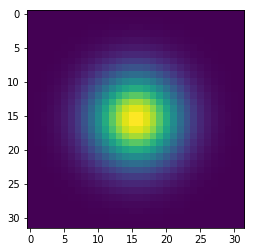

In [80]:
imshow(g, interpolation="nearest")

### Numerical differencing on NumPy arrays

Now we want to construct

$$\nabla^2 g \cdot \Delta x^2$$

using differences between adjacent cells (think about the Calculus definition of a derivative)

$$\nabla^2 g \cdot \Delta x^2 \sim {g_{i-1,j} + g_{i+1,j} - 2 g_{i,j}} + {g_{i,j-1} + g_{i,j+1} - 2 g_{i,j}}$$

We'll do this two different ways---the first is with explicit loops and the second is using NumPy slice notation

In [81]:
d2g = np.zeros((N,N), dtype=np.float64)

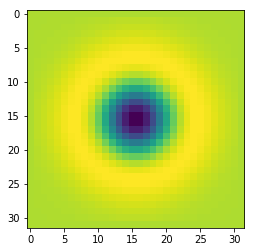

In [82]:
for i in range(1, N-1):
    for j in range(1, N-1):
        d2g[i,j] = g[i+1,j] + g[i-1,j] + g[i,j+1] + g[i,j-1] - 4*g[i,j]

imshow(d2g, interpolation="nearest")

In [83]:
d2gb = np.zeros((N,N), dtype=np.float64)
d2gb.shape

(32, 32)

We can accomplish the same differencing by simply shifting our view into the array

In [84]:
d2gb[1:N-1,1:N-1] = g[2:N,1:N-1] + g[0:N-2,1:N-1] + g[1:N-1,2:N] + g[1:N-1,0:N-2] - 4*g[1:N-1,1:N-1]

In [85]:
print(np.max(d2g - d2gb))

0.0


###  let's take this further, and try to radially bin the data

In [ ]:
rmin = 0
rmax = np.sqrt(xmax**2 + ymax**2)

nbins = np.int(np.sqrt(N**2 + N**2))

In [ ]:
# bins will hold the edges, so there is one more value than actual bin
# bin_centers holds the center value of the bin
bins = np.linspace(rmin, rmax, nbins+1)
bin_centers = 0.5*(bins[1:] + bins[:-1])

In [ ]:
# radius of each zone
xc = 0.5*(xmin + xmax)
yc = 0.5*(ymin + ymax)

r = np.sqrt( (x2d-xc)**2 + (y2d-yc)**2 )

In [ ]:
# bin the radii -- digitize returns an array with the same shape 
# as the input array but with elements of the array specifying
# which bin that location belongs to (it gives i such that
# bins[i-1] <= x < bins[i]).  The value of whichbin will be 1 
# if we are located in the bin defined by bins[0] to bins[1].  
# This means that whichbin[0] will be 0.
whichbin = np.digitize(r.flat, bins)

In [ ]:
# bincount counts the number of occurrences of each non-negative
# integer value in whichbin.
ncount = np.bincount(whichbin)

In [ ]:
# now bin our function
g_bin = np.zeros(len(ncount)-1, dtype=np.float64)

for n in range(len(ncount)):
    # there is no whichbin == 0 -- that corresponds to the left edge
    g_bin[n-1] = np.sum(g.flat[whichbin==n])/np.sum(ncount[n])

In [ ]:
bin_centers = bin_centers[0:len(ncount)-1]

In [ ]:
scatter(bin_centers, g_bin)